<a href="https://colab.research.google.com/github/bhardwajshivam/Optimizing-Order-Execution-Strategy-for-HFT/blob/main/Data_Collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf

def collect_stock_data(symbol, start_date, end_date):
    """
    Collects historical stock price data for a given symbol and date range.

    Parameters:
        symbol (str): The stock symbol (e.g., AAPL for Apple Inc.).
        start_date (str): The start date in the format 'YYYY-MM-DD'.
        end_date (str): The end date in the format 'YYYY-MM-DD'.

    Returns:
        pandas.DataFrame: DataFrame containing historical stock price data.
    """
    try:
        # Fetch historical data from Yahoo Finance API
        stock_data = yf.download(symbol, start=start_date, end=end_date)
        return stock_data
    except Exception as e:
        print(f"Error: Unable to fetch data for {symbol}. Error Message: {str(e)}")
        return None

# Example usage:
symbol = "AAPL"
start_date = "2013-08-01"
end_date = "2023-08-01"

stock_data = collect_stock_data(symbol, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [2]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-08-01,16.276787,16.314285,16.187857,16.309999,14.141196,206250800
2013-08-02,16.357500,16.530357,16.309286,16.519285,14.322651,274783600
2013-08-05,16.596071,16.809643,16.505358,16.766071,14.536625,318855600
2013-08-06,16.715000,16.853214,16.506071,16.616072,14.406572,334857600
2013-08-07,16.564285,16.678572,16.491785,16.606428,14.398207,298858000


In [3]:
data = stock_data[['Open','Close']]
data

,Open,Close
Date,,
2013-08-01,16.276787,16.309999
2013-08-02,16.357500,16.519285
2013-08-05,16.596071,16.766071
2013-08-06,16.715000,16.616072
2013-08-07,16.564285,16.606428
...,...,...
2023-07-25,193.330002,193.619995
2023-07-26,193.669998,194.500000
2023-07-27,196.020004,193.220001


In [4]:
import matplotlib.pyplot as plt

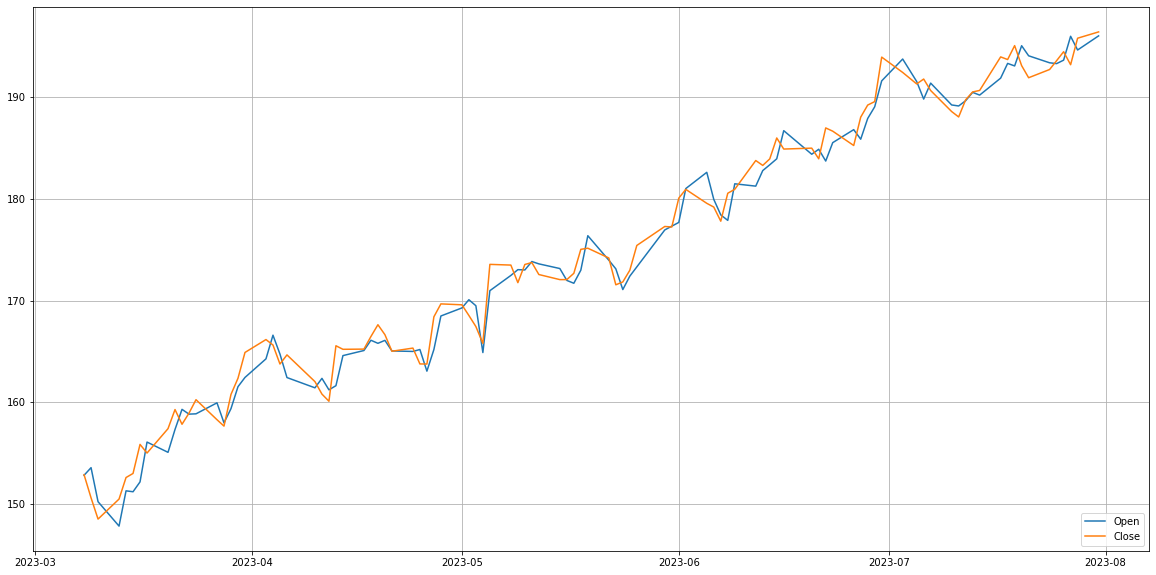

In [5]:
plt.figure(figsize=(20, 10))
plt.plot(data['Open'][-100:])
plt.plot(data['Close'][-100:])
plt.grid(True)
plt.legend(["Open", "Close"], loc ="lower right")
plt.show()

In [6]:
short = []
for i in range(len(data)):
    if data['Open'][i] > data['Close'][i]:
        short.append(1)
    else:
        short.append(0)

data['short'] = short
data

<ipython-input-6-5384a041fcbd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['short'] = short


,Open,Close,short
Date,,,
2013-08-01,16.276787,16.309999,0
2013-08-02,16.357500,16.519285,0
2013-08-05,16.596071,16.766071,0
2013-08-06,16.715000,16.616072,1
2013-08-07,16.564285,16.606428,0
...,...,...,...
2023-07-25,193.330002,193.619995,0
2023-07-26,193.669998,194.500000,0
2023-07-27,196.020004,193.220001,1


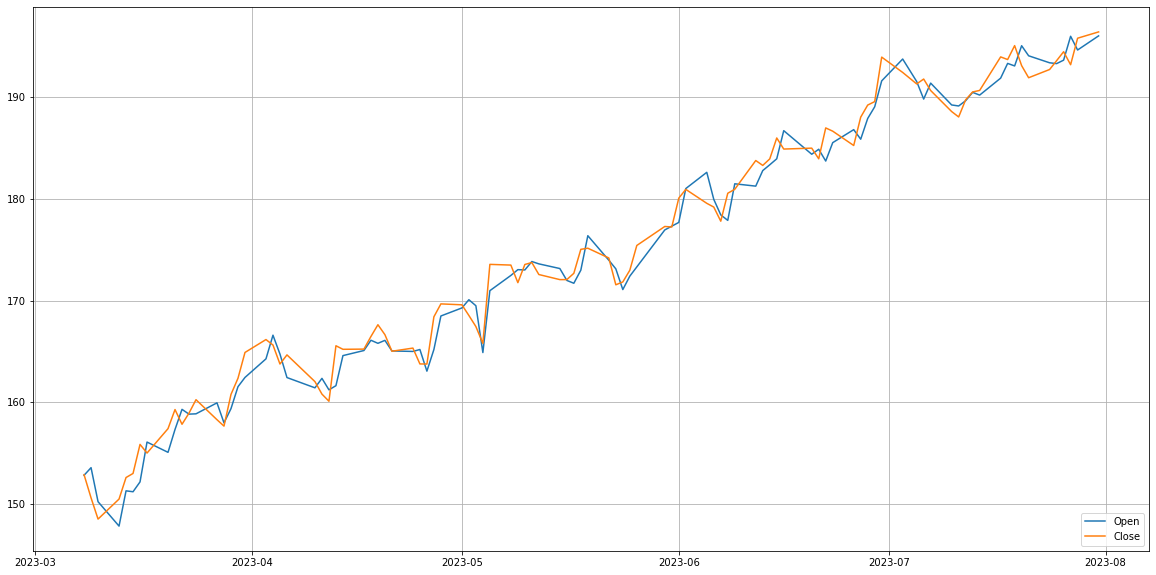

In [7]:
plt.figure(figsize=(20, 10))
plt.plot(data['Open'][-100:])
plt.plot(data['Close'][-100:])
#plt.plot(s[-100:],marker='o')
plt.grid(True)
plt.legend(["Open", "Close"], loc ="lower right")
plt.show()

In [8]:
data["lag1"] = data['Close'].shift(periods=1)
data["lag2"] = data['Close'].shift(periods=2)
data["lag3"] = data['Close'].shift(periods=3)
data["lag4"] = data['Close'].shift(periods=4)
data["lag5"] = data['Close'].shift(periods=5)
data

<ipython-input-8-80bdf2b5b689>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["lag1"] = data['Close'].shift(periods=1)
<ipython-input-8-80bdf2b5b689>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["lag2"] = data['Close'].shift(periods=2)


,Open,Close,short,lag1,lag2,lag3,lag4,lag5
Date,,,,,,,,
2013-08-01,16.276787,16.309999,0,NaN,NaN,NaN,NaN,NaN
2013-08-02,16.357500,16.519285,0,16.309999,NaN,NaN,NaN,NaN
2013-08-05,16.596071,16.766071,0,16.519285,16.309999,NaN,NaN,NaN
2013-08-06,16.715000,16.616072,1,16.766071,16.519285,16.309999,NaN,NaN
2013-08-07,16.564285,16.606428,0,16.616072,16.766071,16.519285,16.309999,NaN
...,...,...,...,...,...,...,...,...
2023-07-25,193.330002,193.619995,0,192.750000,191.940002,193.130005,195.100006,193.729996
2023-07-26,193.669998,194.500000,0,193.619995,192.750000,191.940002,193.130005,195.100006
2023-07-27,196.020004,193.220001,1,194.500000,193.619995,192.750000,191.940002,193.130005


In [9]:
data.dropna(inplace = True)
data

,Open,Close,short,lag1,lag2,lag3,lag4,lag5
Date,,,,,,,,
2013-08-08,16.566429,16.464643,1,16.606428,16.616072,16.766071,16.519285,16.309999
2013-08-09,16.379999,16.230356,1,16.464643,16.606428,16.616072,16.766071,16.519285
2013-08-12,16.316429,16.691429,0,16.230356,16.464643,16.606428,16.616072,16.766071
2013-08-13,16.819286,17.484644,0,16.691429,16.230356,16.464643,16.606428,16.616072
2013-08-14,17.781429,17.803572,0,17.484644,16.691429,16.230356,16.464643,16.606428
...,...,...,...,...,...,...,...,...
2023-07-25,193.330002,193.619995,0,192.750000,191.940002,193.130005,195.100006,193.729996
2023-07-26,193.669998,194.500000,0,193.619995,192.750000,191.940002,193.130005,195.100006
2023-07-27,196.020004,193.220001,1,194.500000,193.619995,192.750000,191.940002,193.130005


In [10]:
data.corr()

,Open,Close,short,lag1,lag2,lag3,lag4,lag5
Open,1.000000,0.999671,-0.006814,0.999828,0.999331,0.998881,0.998499,0.998131
Close,0.999671,1.000000,-0.021735,0.999501,0.999055,0.998639,0.998246,0.997863
short,-0.006814,-0.021735,1.000000,-0.006443,-0.007769,-0.007760,-0.007591,-0.007906
lag1,0.999828,0.999501,-0.006443,1.000000,0.999500,0.999054,0.998637,0.998243
lag2,0.999331,0.999055,-0.007769,0.999500,1.000000,0.999500,0.999052,0.998635
lag3,0.998881,0.998639,-0.007760,0.999054,0.999500,1.000000,0.999499,0.999050
lag4,0.998499,0.998246,-0.007591,0.998637,0.999052,0.999499,1.000000,0.999498
lag5,0.998131,0.997863,-0.007906,0.998243,0.998635,0.999050,0.999498,1.000000


In [11]:
s1 = []
s2 = []
s3 = []
s4 = []
s5 = []

for i in range(len(data)):
    s1.append(data['lag1'][i]/1)
    s2.append(data['lag2'][i]/2)
    s3.append(data['lag3'][i]/3)
    s4.append(data['lag4'][i]/4)
    s5.append(data['lag5'][i]/5)

data['s1'] = s1
data['s2'] = s2
data['s3'] = s3
data['s4'] = s4
data['s5'] = s5
data

,Open,Close,short,lag1,lag2,lag3,lag4,lag5,s1,s2,s3,s4,s5
Date,,,,,,,,,,,,,
2013-08-08,16.566429,16.464643,1,16.606428,16.616072,16.766071,16.519285,16.309999,16.606428,8.308036,5.588690,4.129821,3.262000
2013-08-09,16.379999,16.230356,1,16.464643,16.606428,16.616072,16.766071,16.519285,16.464643,8.303214,5.538691,4.191518,3.303857
2013-08-12,16.316429,16.691429,0,16.230356,16.464643,16.606428,16.616072,16.766071,16.230356,8.232322,5.535476,4.154018,3.353214
2013-08-13,16.819286,17.484644,0,16.691429,16.230356,16.464643,16.606428,16.616072,16.691429,8.115178,5.488214,4.151607,3.323214
2013-08-14,17.781429,17.803572,0,17.484644,16.691429,16.230356,16.464643,16.606428,17.484644,8.345715,5.410119,4.116161,3.321286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-25,193.330002,193.619995,0,192.750000,191.940002,193.130005,195.100006,193.729996,192.750000,95.970001,64.376668,48.775002,38.745999
2023-07-26,193.669998,194.500000,0,193.619995,192.750000,191.940002,193.130005,195.100006,193.619995,96.375000,63.980001,48.282501,39.020001
2023-07-27,196.020004,193.220001,1,194.500000,193.619995,192.750000,191.940002,193.130005,194.500000,96.809998,64.250000,47.985001,38.626001


In [35]:
data.to_csv('AAPLdata.csv')

In [12]:
data.corr()

,Open,Close,short,lag1,lag2,lag3,lag4,lag5,s1,s2,s3,s4,s5
Open,1.000000,0.999671,-0.006814,0.999828,0.999331,0.998881,0.998499,0.998131,0.999828,0.999331,0.998881,0.998499,0.998131
Close,0.999671,1.000000,-0.021735,0.999501,0.999055,0.998639,0.998246,0.997863,0.999501,0.999055,0.998639,0.998246,0.997863
short,-0.006814,-0.021735,1.000000,-0.006443,-0.007769,-0.007760,-0.007591,-0.007906,-0.006443,-0.007769,-0.007760,-0.007591,-0.007906
lag1,0.999828,0.999501,-0.006443,1.000000,0.999500,0.999054,0.998637,0.998243,1.000000,0.999500,0.999054,0.998637,0.998243
lag2,0.999331,0.999055,-0.007769,0.999500,1.000000,0.999500,0.999052,0.998635,0.999500,1.000000,0.999500,0.999052,0.998635
lag3,0.998881,0.998639,-0.007760,0.999054,0.999500,1.000000,0.999499,0.999050,0.999054,0.999500,1.000000,0.999499,0.999050
lag4,0.998499,0.998246,-0.007591,0.998637,0.999052,0.999499,1.000000,0.999498,0.998637,0.999052,0.999499,1.000000,0.999498
lag5,0.998131,0.997863,-0.007906,0.998243,0.998635,0.999050,0.999498,1.000000,0.998243,0.998635,0.999050,0.999498,1.000000
s1,0.999828,0.999501,-0.006443,1.000000,0.999500,0.999054,0.998637,0.998243,1.000000,0.999500,0.999054,0.998637,0.998243
s2,0.999331,0.999055,-0.007769,0.999500,1.000000,0.999500,0.999052,0.998635,0.999500,1.000000,0.999500,0.999052,0.998635


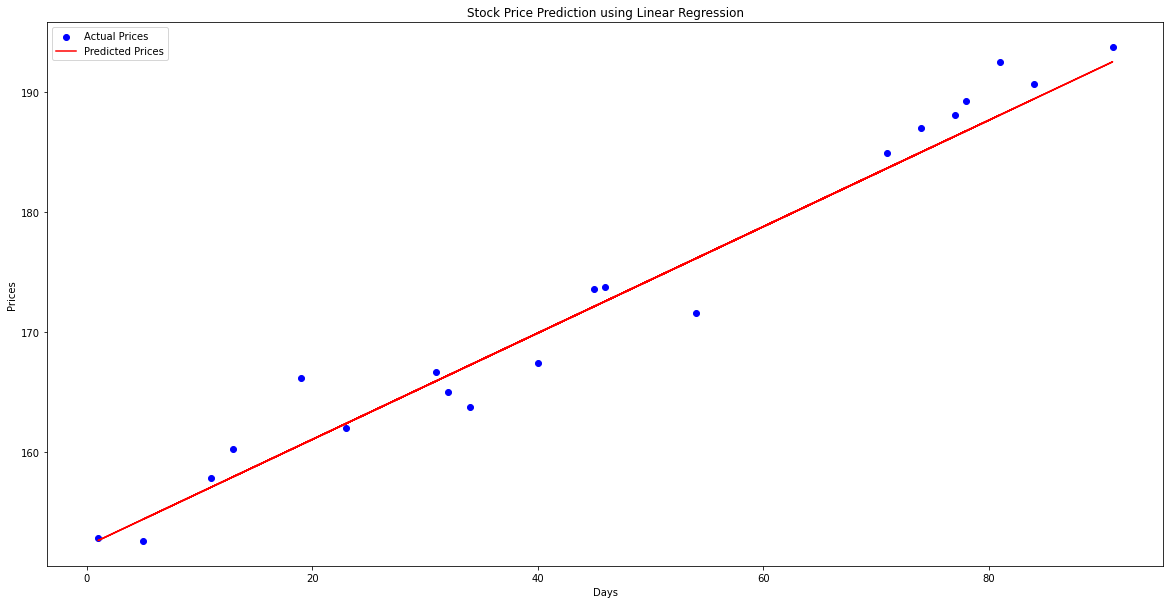

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
days = np.arange(1, 101)
prices = data['Close'][-100:]

# Create a DataFrame
df = pd.DataFrame({'Days': days, 'Prices': prices})

# Split data into features (X) and target (y)
X = df[['Days']]
y = df['Prices']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Plot the results
plt.figure(figsize=(20, 10))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', label='Predicted Prices')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.title('Stock Price Prediction using Linear Regression')
plt.legend()
plt.show()


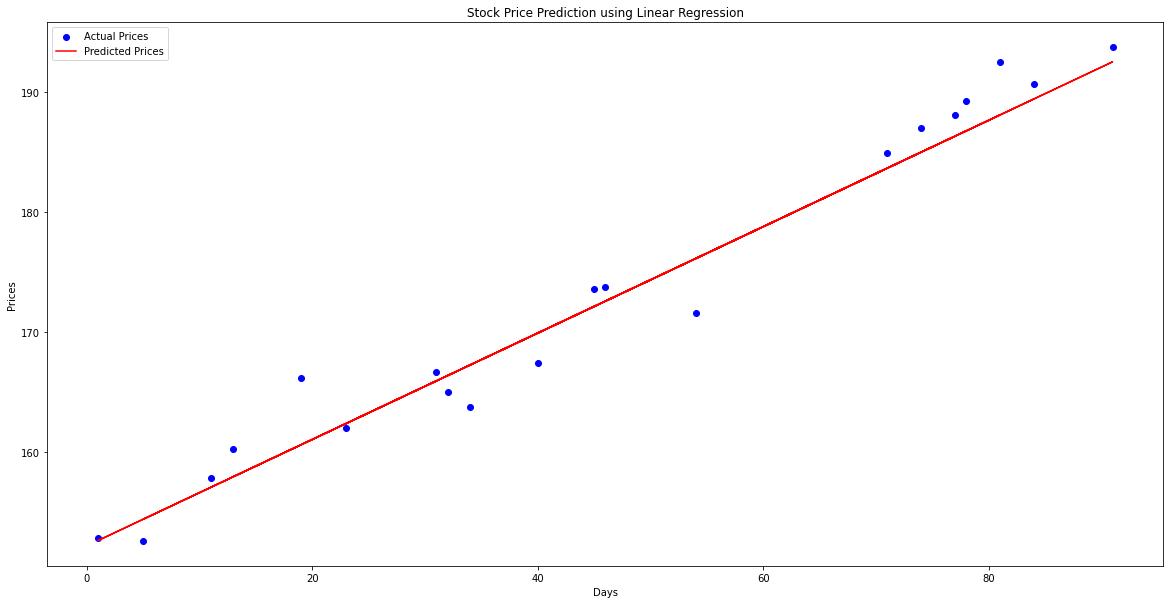

In [14]:
from sklearn.preprocessing import PolynomialFeatures

# Generate sample data
np.random.seed(42)
days = np.arange(1, 101)
prices = data['Close'][-100:]

# Create a DataFrame
df = pd.DataFrame({'Days': days, 'Prices': prices})

# Split data into features (X) and target (y)
X = df[['Days']]
y = df['Prices']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Train the model on the polynomial features
model.fit(X_train_poly, y_train)

# Make predictions on the polynomial test data
y_pred = model.predict(X_test_poly)

# Plot the results
plt.figure(figsize=(20, 10))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', label='Predicted Prices')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.title('Stock Price Prediction using Linear Regression')
plt.legend()
plt.show()


In [15]:
!pip install statsmodels

In [16]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(df['Prices'], order=(5, 1, 5))
fitted_model = model.fit()

# Make predictions
forecast, stderr, conf_int = fitted_model.forecast(steps=30)

# Plot results
plt.plot(df['Prices'], label='Actual Prices')
plt.plot(np.arange(len(df), len(df) + 30), forecast, label='Predicted Prices')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.title('Stock Price Prediction using ARIMA Model')
plt.legend()
plt.show()


/Users/shivambhardwaj/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/shivambhardwaj/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/shivambhardwaj/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/shivambhardwaj/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zer

ValueError: too many values to unpack (expected 3)

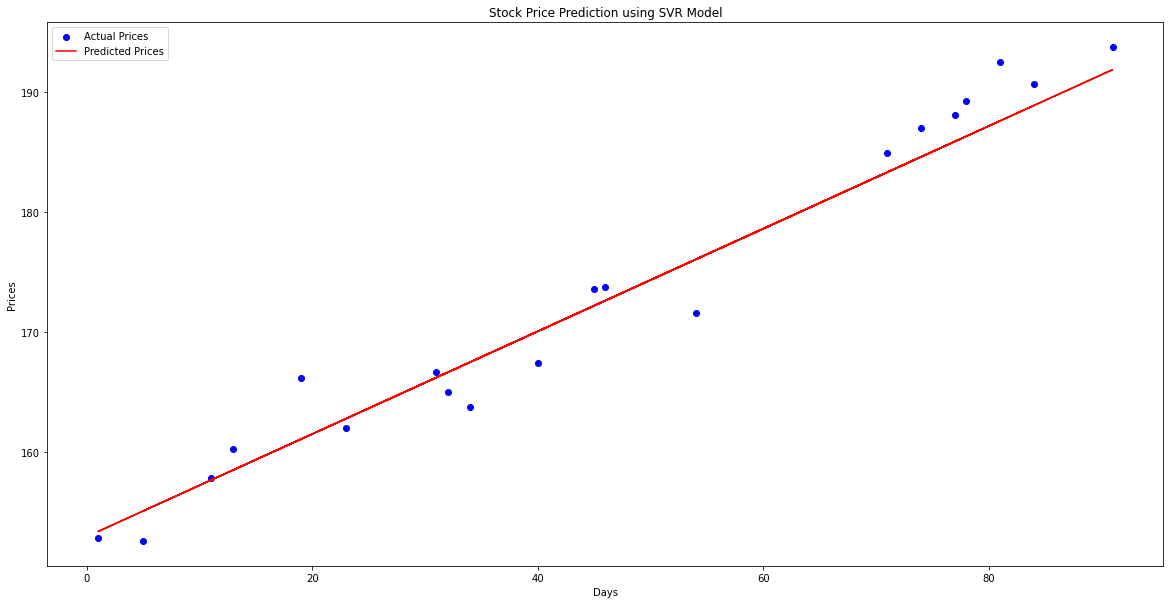

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR


# Split data into features (X) and target (y)
X = df.drop('Prices', axis=1)
y = df['Prices']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create SVR model
model = SVR(kernel='linear')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Plot results
plt.figure(figsize=(20, 10))
plt.scatter(X_test['Days'], y_test, color='blue', label='Actual Prices')
plt.plot(X_test['Days'], y_pred, color='red', label='Predicted Prices')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.title('Stock Price Prediction using SVR Model')
plt.legend()
plt.show()


In [17]:
c = data.corr()

In [18]:
d = dict(c['Close'])

In [19]:
f = sorted(d.items(),key = lambda x:x[1])

In [20]:
for i in f:
    print(f[0][0])

short
short
short
short
short
short
short
short
short
short
short
short
short


In [21]:
f[::-1]

[('Close', 1.0),
 ('Open', 0.9996713041304607),
 ('s1', 0.9995013311622802),
 ('lag1', 0.9995013311622802),
 ('s2', 0.9990546482706271),
 ('lag2', 0.9990546482706271),
 ('lag3', 0.9986390946154694),
 ('s3', 0.9986390946154686),
 ('s4', 0.9982459838671117),
 ('lag4', 0.9982459838671117),
 ('s5', 0.9978628461320095),
 ('lag5', 0.9978628461320083),
 ('short', -0.021734770951017918)]